In [1]:
%load_ext autoreload
%autoreload 2
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from h_test_IQM.datasets.kodak import load_kodak
from h_test_IQM.pipeline import distributions
from h_test_IQM.metrics import IQMs
from h_test_IQM.distortions import noise_sphere

In [2]:
kodak_ims = load_kodak()
epsilon_sphere = noise_sphere.epislon_noise(epsilon=40)
br = IQMs.BRISQUE_diff()

def test_single(args):
    results = distributions.get_IQM_sensitivity(
        img=args[0], IQM=args[1], distortion=args[2], num_samples=10)
    return results

mp = False   # cannot use multiprocessing in with many IQMs currently...
if mp == True:
    n_cpus = multiprocessing.cpu_count()
    args = [(img, br, epsilon_sphere) for img in kodak_ims]
    with multiprocessing.Pool(processes=n_cpus) as pool:
        scores = list(tqdm(pool.imap_unordered(test_single, args),
                        total=len(kodak_ims), leave=False))

else:        
    scores = []
    for img in tqdm(kodak_ims):
        results = distributions.get_IQM_sensitivity(
            img, IQM=br, distortion=epsilon_sphere, num_samples=10)
        scores.append(results)

100%|██████████| 24/24 [01:33<00:00,  3.89s/it]


In [6]:
# convert all into one
all_scores = []
for results in scores:
    for sample in results:
        all_scores.append(sample)

In [4]:
all_scores = np.array(all_scores)
all_scores.shape

(230,)

(array([ 3.,  2.,  2.,  3.,  0.,  1.,  2.,  7.,  0.,  0.,  0.,  2.,  4.,
         5.,  6.,  3.,  5.,  3.,  2.,  0.,  0.,  3.,  5.,  1.,  0.,  2.,
         4.,  7.,  6.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         9.,  3.,  9., 13., 13., 11.,  7.,  3.,  1.,  2.,  2.,  2.,  1.,
         2.,  0.,  0.,  2.,  4.,  5., 13., 11., 10.,  3.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  4.,  2.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  3.,  4.,  2.,  0.,  1.]),
 array([11.89, 12.3 , 12.71, 13.12, 13.53, 13.94, 14.35, 14.76, 15.17,
        15.58, 15.99, 16.4 , 16.81, 17.22, 17.63, 18.04, 18.45, 18.86,
        19.27, 19.68, 20.09, 20.5 , 20.91, 21.32, 21.73, 22.14, 22.55,
        22.96, 23.37, 23.78, 24.19, 24.6 , 25.01, 25.42, 25.83, 26.24,
        26.65, 27.06, 27.47, 27.88, 28.29, 28.7 , 29.11, 29.52, 29.93,
        30.34, 30.75, 31.16, 31.57, 31.98, 32.39, 32.8 , 33.21, 33.62,
        

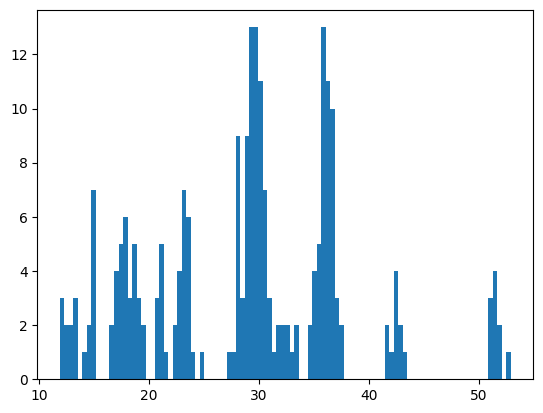

In [7]:
# plot histogram of scores
plt.hist(all_scores, bins=100)